In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
import tensorflow as tf

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-dataset/car_price_dataset.csv


# 1.Loading and Exploring the Dataset

### Reading the dataset and previewing the first 5 rows

In [2]:
cars = pd.read_csv("/kaggle/input/car-price-dataset/car_price_dataset.csv")
cars.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


### Overview of the dataset

In [3]:
print("Dataset shape: ",cars.shape)
print("\nColumn Names and Data Types:\n")
cars.info()

Dataset shape:  (10000, 10)

Column Names and Data Types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


### Checking for missing values

In [4]:
print("\nMissing Values:\n")
cars.isnull().sum()


Missing Values:



Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

### Checking for Duplicated Rows

In [5]:
print("\nDuplicate Rows:",cars.duplicated().sum())


Duplicate Rows: 0


# 2.Univariate Analysis

### Analysing and Visualizing Categorical Columns

Value Counts : 
 Brand
Ford          1048
Audi          1038
Volkswagen    1020
Honda         1009
Chevrolet     1003
BMW            999
Hyundai        995
Kia            976
Toyota         970
Mercedes       942
Name: count, dtype: int64
Brand distribution


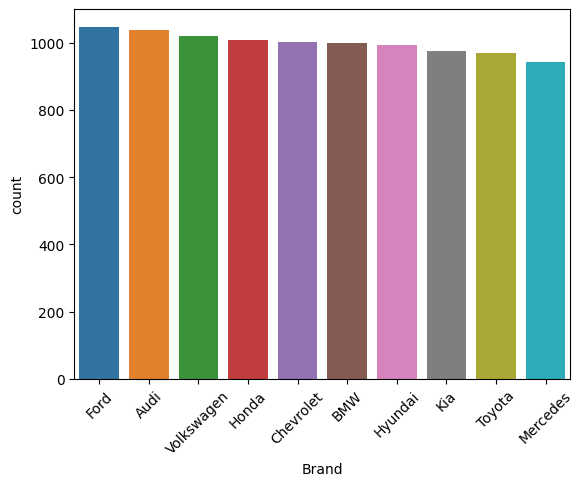

Value Counts : 
 Fuel_Type
Electric    2625
Diesel      2512
Hybrid      2453
Petrol      2410
Name: count, dtype: int64
Fuel_Type distribution


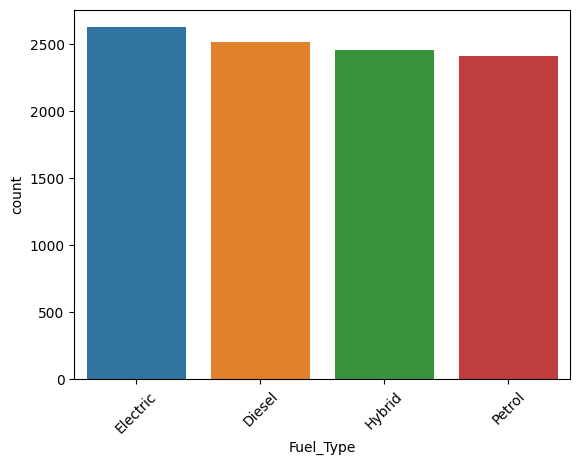

Value Counts : 
 Transmission
Manual            3372
Automatic         3317
Semi-Automatic    3311
Name: count, dtype: int64
Transmission distribution


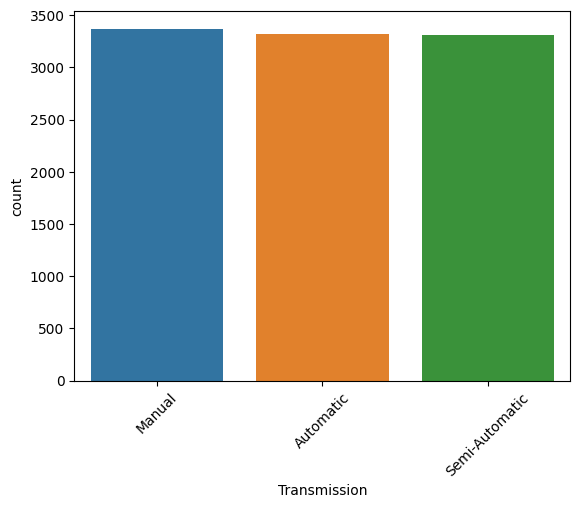

Value Counts : 
 Doors
3    2575
4    2514
5    2456
2    2455
Name: count, dtype: int64
Doors distribution


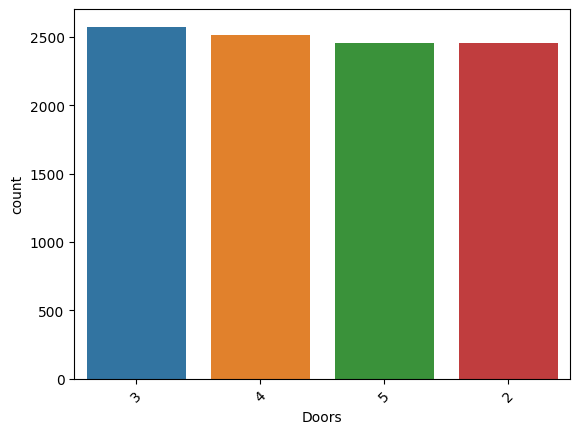

In [6]:
categorical_columns = ["Brand","Fuel_Type","Transmission","Doors"]
for col in categorical_columns:
    print(f"Value Counts : \n",cars[col].value_counts())
    sns.countplot(data=cars,x=col,order=cars[col].value_counts().index)
    print(f"{col} distribution")
    plt.xticks(rotation=45)
    plt.show()

### Analysing Numerical Columns

In [7]:
cars.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


### with the describe function we can begin to undersatnd our dataset : 
#### - The production year of the all the cars in this dataset between 2000 and 2023. 
#### - The engine size of the cars in this dataset is between 1 L and 5 L.
#### - and for the Owrneship we see that on average, 3 owners for all the cars.

## Price Vs. Other Features

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


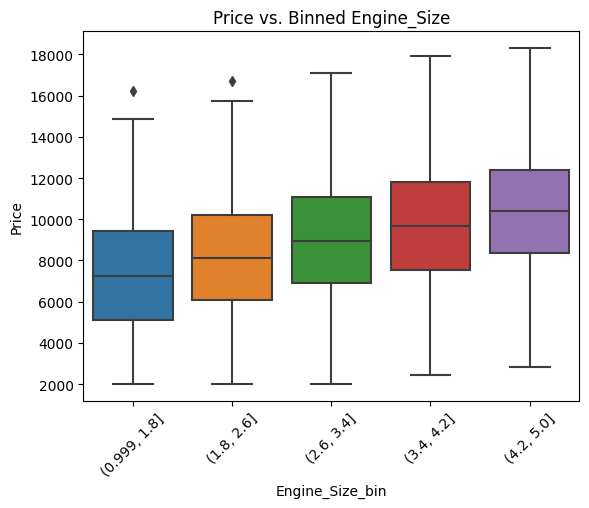

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


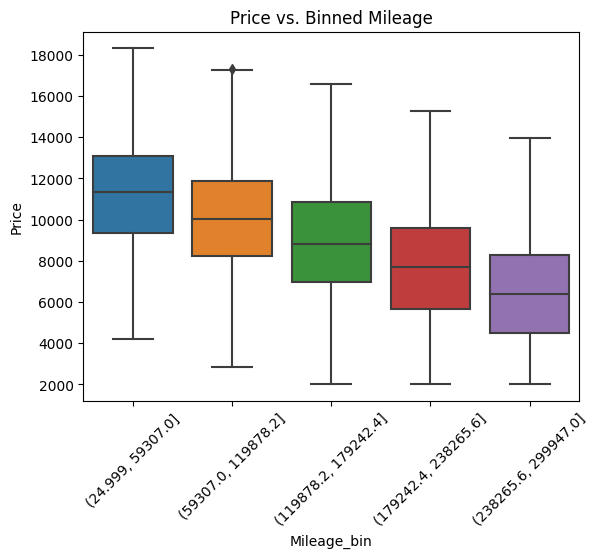

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


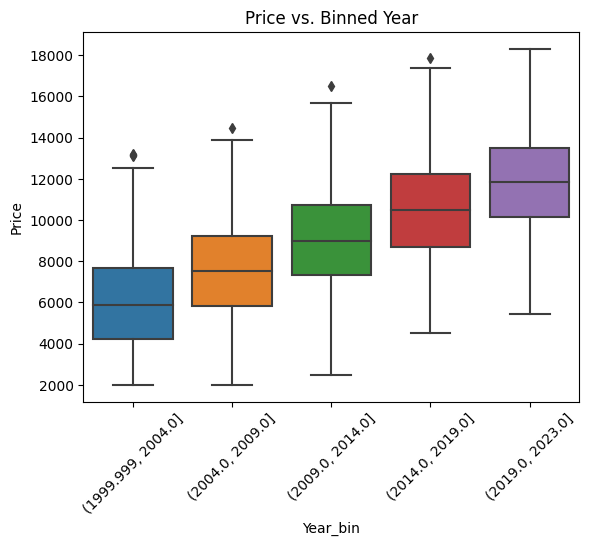

In [8]:
for col in ["Engine_Size","Mileage","Year"]:
    cars[f"{col}_bin"] = pd.qcut(cars[col],q=5)
    sns.boxplot(data=cars,x=f"{col}_bin",y="Price")
    plt.xticks(rotation=45)
    plt.title(f"Price vs. Binned {col}")
    plt.show()

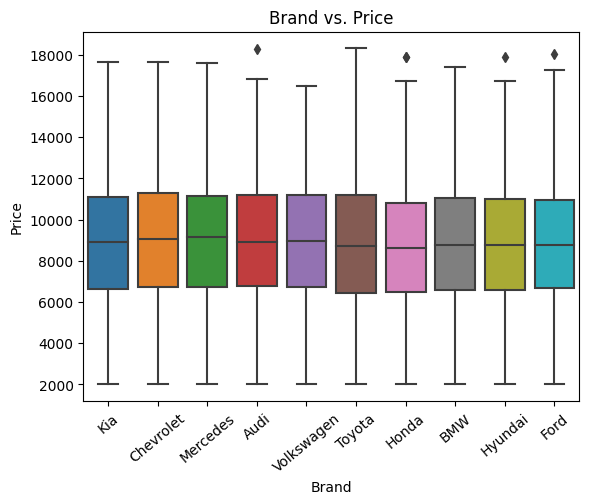

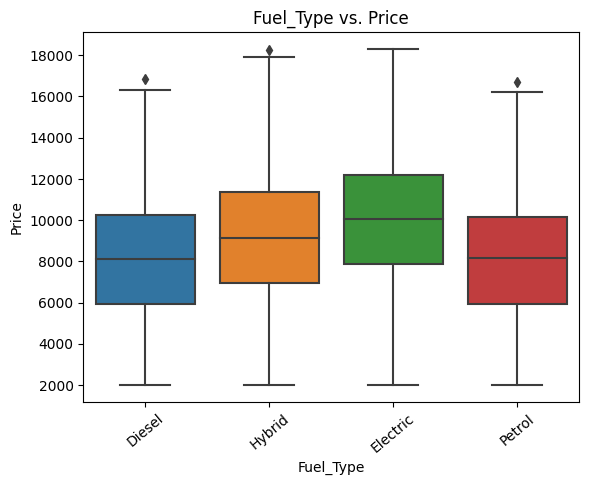

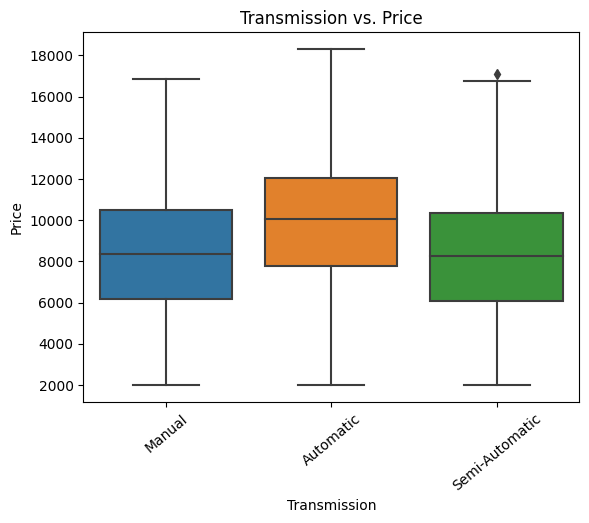

In [9]:
# Boxplot for categorical columns vs.Price
for col in ["Brand","Fuel_Type","Transmission"]:
    sns.boxplot(data=cars,x=col,y="Price")
    plt.title(f"{col} vs. Price")
    plt.xticks(rotation=40)
    plt.show()

### We can observe from these Boxplots that :
* The price for the multiple brands in this dataset are in the range of 6000 and 12000.
* the most expensive fuel type is Hybrid while Diesel and Petrol are the cheapest
* Automatic Transmission is the the most expensive compared to Semi-Automatic and Manual Transmission
  

# Feature Engineering

In [10]:
# calculating Car Age
cars["Car_Age"] = 2025 - cars["Year"]
cars[["Year","Car_Age"]].head()

,Year,Car_Age
0,2020,5
1,2012,13
2,2020,5
3,2023,2
4,2003,22


In [11]:
# Mileage Range Grouping

cars["Mileage_Range"] = pd.cut(cars["Mileage"],bins=[0,50000,100000,150000,200000,np.inf],labels=["Low","Medium","High","Very High","Extremly High"])
cars[["Mileage","Mileage_Range"]].head()

,Mileage,Mileage_Range
0,289944,Extremly High
1,5356,Low
2,231440,Extremly High
3,160971,Very High
4,286618,Extremly High


# What is the average price for every Fuel Type ?

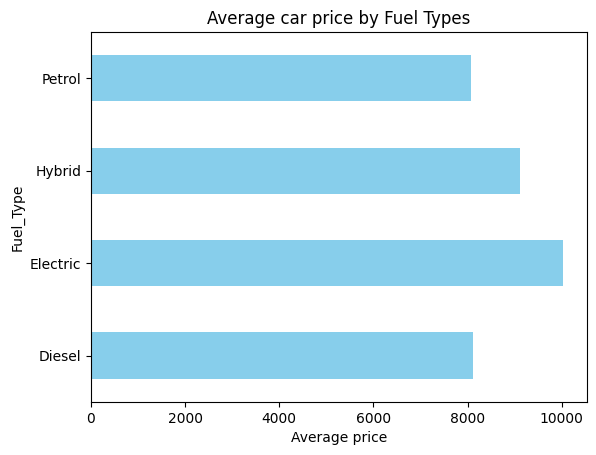

In [12]:
grouped = cars.groupby("Fuel_Type")["Price"].mean()
grouped.plot(kind="barh",color="skyblue")
plt.title("Average car price by Fuel Types")
plt.xlabel("Average price")
plt.show()

# Mileage Patterns
### What is the average mileage for different Fuel_type cars?

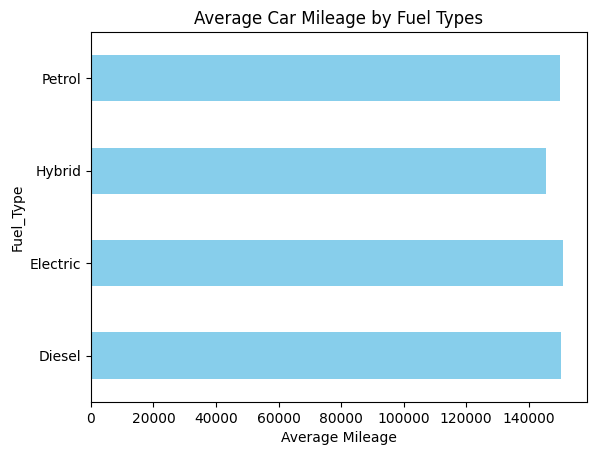

In [13]:
grouped = cars.groupby("Fuel_Type")["Mileage"].mean()
grouped.plot(kind="barh",color="skyblue")
plt.title("Average Car Mileage by Fuel Types")
plt.xlabel("Average Mileage")
plt.show()

### All of them are in the same Mileage Range.
### Do Newer Cars Have Significantly better mileage?

In [14]:
correlation = cars[["Year","Mileage"]].corr()
print(correlation)

             Year   Mileage
Year     1.000000 -0.002476
Mileage -0.002476  1.000000


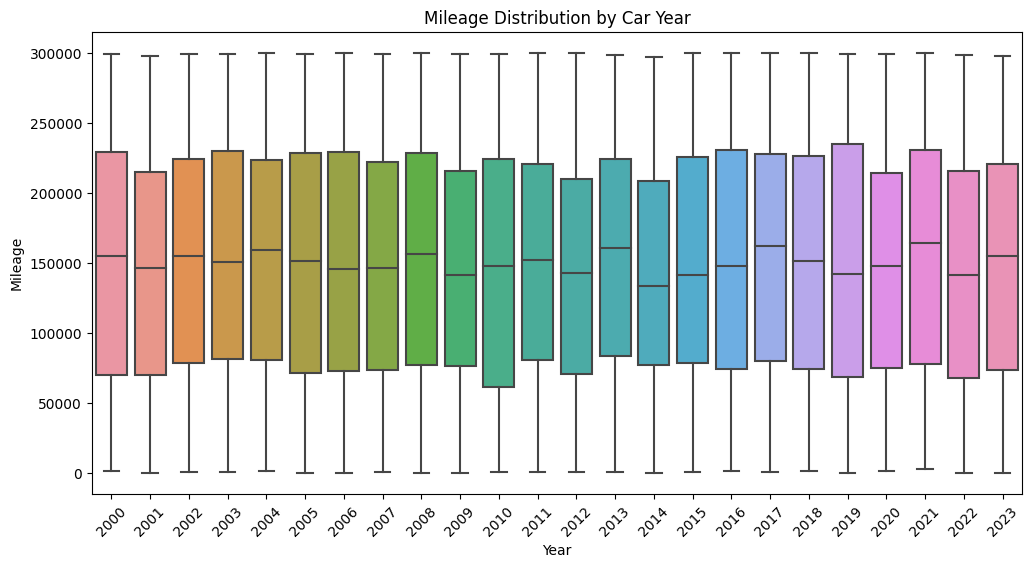

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(data=cars,x="Year",y="Mileage")
plt.xticks(rotation=45)
plt.title("Mileage Distribution by Car Year")
plt.show()

In [16]:
# Statistical test
from scipy.stats import ttest_ind

old_cars = cars[cars["Year"] < cars["Year"].median()]["Mileage"]
new_cars = cars[cars["Year"] >= cars["Year"].median()]["Mileage"]

t_stat,p_value = ttest_ind(old_cars,new_cars,equal_var=False)
print(f"T-statistic : {t_stat}, P_value : {p_value}")

T-statistic : 0.5432267217507641, P_value : 0.5869858243571717


## we observe that there's not a significant difference in mileage between older and newer cars.

## How does mileage affect the resale price of a car ?

In [17]:
correlation = cars[["Price","Mileage"]].corr()
print(correlation)


# Statistical test
from scipy.stats import ttest_ind

low_mileage = cars[cars["Mileage"] < cars["Mileage"].median()]["Price"]
high_mileage = cars[cars["Mileage"] >= cars["Mileage"].median()]["Price"]

t_stat,p_value = ttest_ind(low_mileage,high_mileage,equal_var=False)
print(f"T-statistic : {t_stat}, P_value : {p_value}")

            Price   Mileage
Price    1.000000 -0.551227
Mileage -0.551227  1.000000
T-statistic : 54.16112293130196, P_value : 0.0


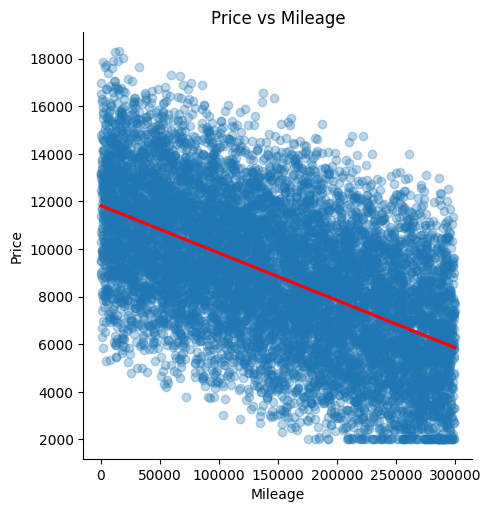

In [18]:
sns.lmplot(data=cars, x='Mileage', y='Price', scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title("Price vs Mileage")
plt.show()

 ### We observe that High mileage actually reduces the car price.

## How does the price of a car decrease with age?

In [19]:
correlation = cars[["Price","Car_Age"]].corr()
print(correlation)


# Statistical test
from scipy.stats import ttest_ind

low_age = cars[cars["Car_Age"] < cars["Car_Age"].median()]["Price"]
high_age = cars[cars["Car_Age"] >= cars["Car_Age"].median()]["Price"]

t_stat,p_value = ttest_ind(low_age,high_age,equal_var=False)
print(f"T-statistic : {t_stat}, P_value : {p_value}")

            Price   Car_Age
Price    1.000000 -0.663036
Car_Age -0.663036  1.000000
T-statistic : 69.3646960838146, P_value : 0.0


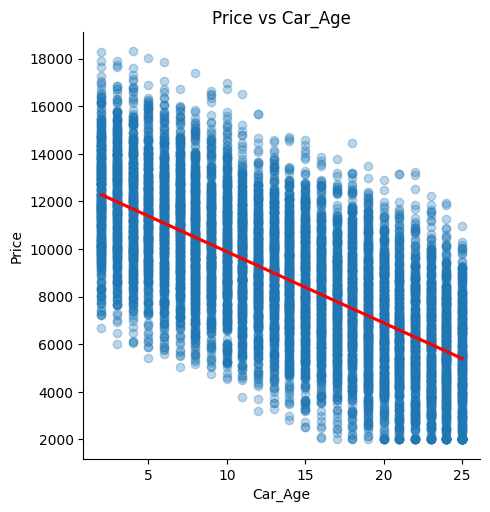

In [20]:
sns.lmplot(data=cars, x='Car_Age', y='Price', scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title("Price vs Car_Age")
plt.show()

 ### We observe that older cars actually reduces the car price.

## Is the rate of depreciation consistent across brands or higher for premium brands?

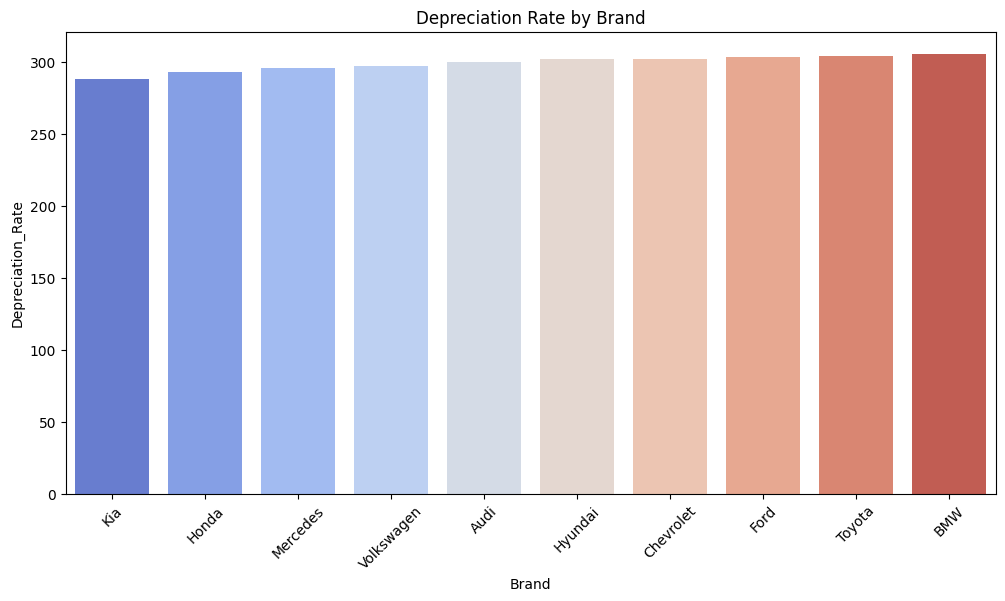

In [21]:
from sklearn.linear_model import LinearRegression
import numpy as np

brand_depreciation = {}

for brand in cars['Brand'].unique():
    df_brand = cars[cars['Brand'] == brand]
    
    X = df_brand[['Year']]
    y = df_brand['Price']
    
    model = LinearRegression()
    model.fit(X, y)
    
    brand_depreciation[brand] = model.coef_[0]  # The slope (depreciation rate)

# Convert to DataFrame for better visualization
import pandas as pd
depreciation_df = pd.DataFrame(brand_depreciation.items(), columns=['Brand', 'Depreciation_Rate'])
depreciation_df.sort_values(by='Depreciation_Rate', ascending=True, inplace=True)

plt.figure(figsize=(12,6))
sns.barplot(data=depreciation_df, x='Brand', y='Depreciation_Rate', palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Depreciation Rate by Brand")
plt.show()


# Making a deep learning model to predict prices based on a set of features

In [22]:
cars.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,Engine_Size_bin,Mileage_bin,Year_bin,Car_Age,Mileage_Range
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501,"(3.4, 4.2]","(238265.6, 299947.0]","(2019.0, 2023.0]",5,Extremly High
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092,"(1.8, 2.6]","(24.999, 59307.0]","(2009.0, 2014.0]",13,Low
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171,"(3.4, 4.2]","(179242.4, 238265.6]","(2019.0, 2023.0]",5,Extremly High
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780,"(1.8, 2.6]","(119878.2, 179242.4]","(2019.0, 2023.0]",2,Very High
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867,"(1.8, 2.6]","(238265.6, 299947.0]","(1999.999, 2004.0]",22,Extremly High


In [23]:
numerical_cols = ["Car_Age","Engine_Size","Mileage","Doors","Owner_Count"]
categorical_cols = ["Brand","Fuel_Type","Transmission"]

# Create dummy variables for categorical columns
data = pd.get_dummies(cars, columns=categorical_cols, drop_first=True)

# Extract dummy column names (Brand_, Fuel_Type_, Transmission_ prefixes)
dummy_cols = [col for col in data.columns if any(col.startswith(cat) for cat in categorical_cols)]

# Combine numerical columns and dummy variables
features = numerical_cols + dummy_cols

#extracting features and target
X = data[features].values
y = data["Price"].values

# Splitting and training the dataset

In [24]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalize features
xscaler = MinMaxScaler(feature_range=(0,1))
X_train = xscaler.fit_transform(X_train)
X_test = xscaler.transform(X_test)

# Normalize target
yscaler = MinMaxScaler(feature_range=(0,1))
y_train = yscaler.fit_transform(y_train.reshape(-1,1))
y_test = yscaler.transform(y_test.reshape(-1,1))

In [25]:
input_dim = X_train.shape[1]
model = Sequential()
model.add(Dense(units = 64, kernel_initializer="uniform",activation = "relu",input_dim = X_train.shape[1]))
model.add(Dense(units = 16, kernel_initializer="uniform",activation = "relu"))
model.add(Dense(units= 1,kernel_initializer = "uniform",activation ="relu"))
model.compile(optimizer=Adam(learning_rate=0.001),loss = "mse",metrics=["mean_absolute_error"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Model fitting

In [26]:
# Training the Artificial Neural Network
model.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_data = (X_test,y_test))

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0986 - mean_absolute_error: 0.2503 - val_loss: 0.0035 - val_mean_absolute_error: 0.0454
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0021 - mean_absolute_error: 0.0330 - val_loss: 3.3571e-04 - val_mean_absolute_error: 0.0101
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.5570e-04 - mean_absolute_error: 0.0087 - val_loss: 1.7740e-04 - val_mean_absolute_error: 0.0067
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2314e-04 - mean_absolute_error: 0.0056 - val_loss: 1.0318e-04 - val_mean_absolute_error: 0.0047
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6005e-05 - mean_absolute_error: 0.0042 - val_loss: 6.1214e-05 - val_mean_absolute_error: 0.0035
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.8845e-05 - mean_absolute_error: 0.0031 - val_loss: 3.8073e-05 - val_mean_absolute_error: 0.0029
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - los

# Saving the trained model

In [27]:
from tensorflow.keras.models import save_model

# Save the model
model.save("car_price_model.keras")

# Save the scalers (if used)
import joblib
joblib.dump(xscaler, "xscaler.pkl")
joblib.dump(yscaler, "yscaler.pkl")

['yscaler.pkl']